In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd. read_csv('insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
532,59,male,29.7,2,no,southeast,12925.886
762,33,male,27.1,1,yes,southwest,19040.876
908,63,male,39.8,3,no,southwest,15170.069
982,31,male,25.9,3,yes,southwest,19199.944
584,19,male,20.7,0,no,southwest,1242.816


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
cat_cols = df.select_dtypes(exclude='number').columns.to_list()

In [8]:
print(f"Categorical columns: {cat_cols}")

Categorical columns: ['sex', 'smoker', 'region']


In [9]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()

In [10]:
print(f"Numeric columns: {num_cols}")

Numeric columns: ['age', 'bmi', 'children', 'charges']


In [11]:
sns.set_context('paper', font_scale = 1.2)
sns.set_style('darkgrid')

<Axes: xlabel='age', ylabel='Count'>

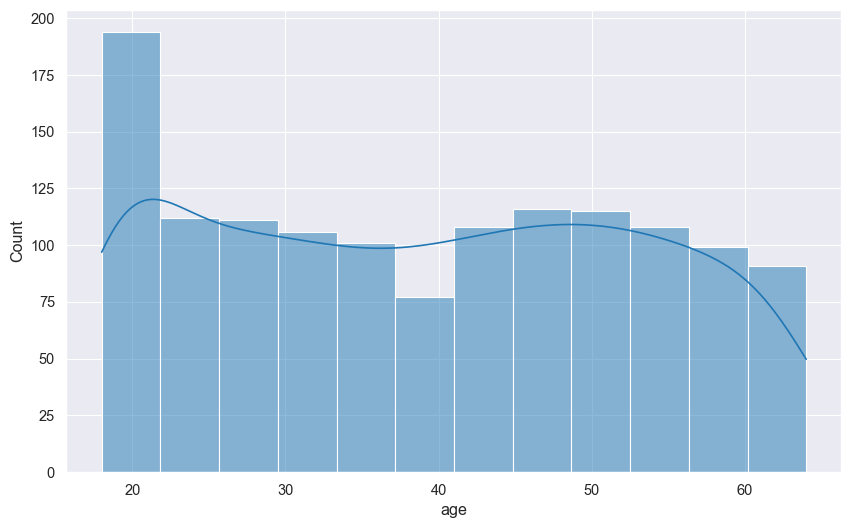

In [12]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.histplot(df['age'],kde=True)

<Axes: xlabel='age', ylabel='Density'>

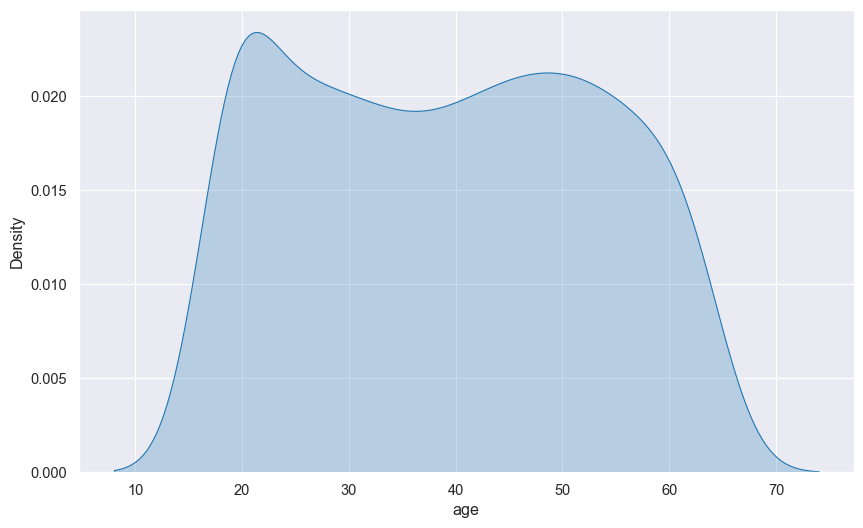

In [13]:
sns.kdeplot(df['age'], fill=True)

In [14]:
df['age'].skew()

np.float64(0.05567251565299186)

Text(0.5, 1.0, 'Boxplot for Age Feature')

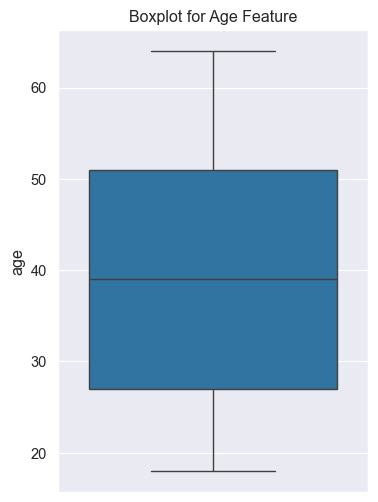

In [15]:
plt.rcParams['figure.figsize'] = (4,6)
sns.boxplot(df['age'])
plt.title("Boxplot for Age Feature")

## Observation: 
### No outlier exists

In [16]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<Axes: xlabel='bmi', ylabel='Count'>

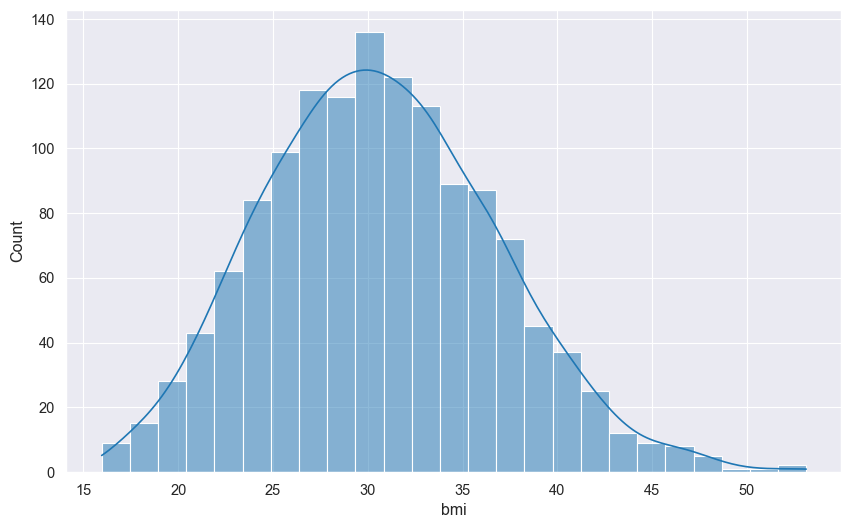

In [17]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.histplot(df['bmi'], kde=True)

### Outlier Detection

Text(0.5, 1.0, 'Outliers in Age Feature')

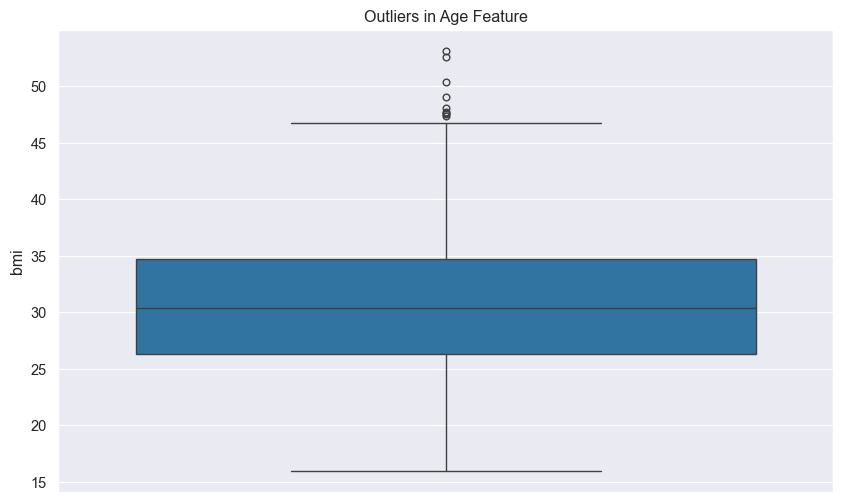

In [18]:
sns.boxplot(df['bmi'])
plt.title('Outliers in Age Feature')

In [19]:
upper = df['bmi'].mean() + 3*df['bmi'].std()
lower = df['bmi'].mean() - 3*df['bmi'].std()

In [20]:
df[(df['bmi'] < lower) | (df['bmi'] > upper)].shape

(4, 7)

### Observation: 
#### There are four outliers in BMI feature to be addressed

In [21]:
df['bmi'] = np.where(df['bmi'] > upper, upper, df['bmi'])

### Categorize numerical variable: BMI

In [22]:
num_to_cat_df = pd.DataFrame()

In [23]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 40:
        return 'Obese'
    else:
        return 'Very Obese'

In [24]:
num_to_cat_df['bmi'] = df['bmi'].apply(categorize_bmi)

<Axes: ylabel='count'>

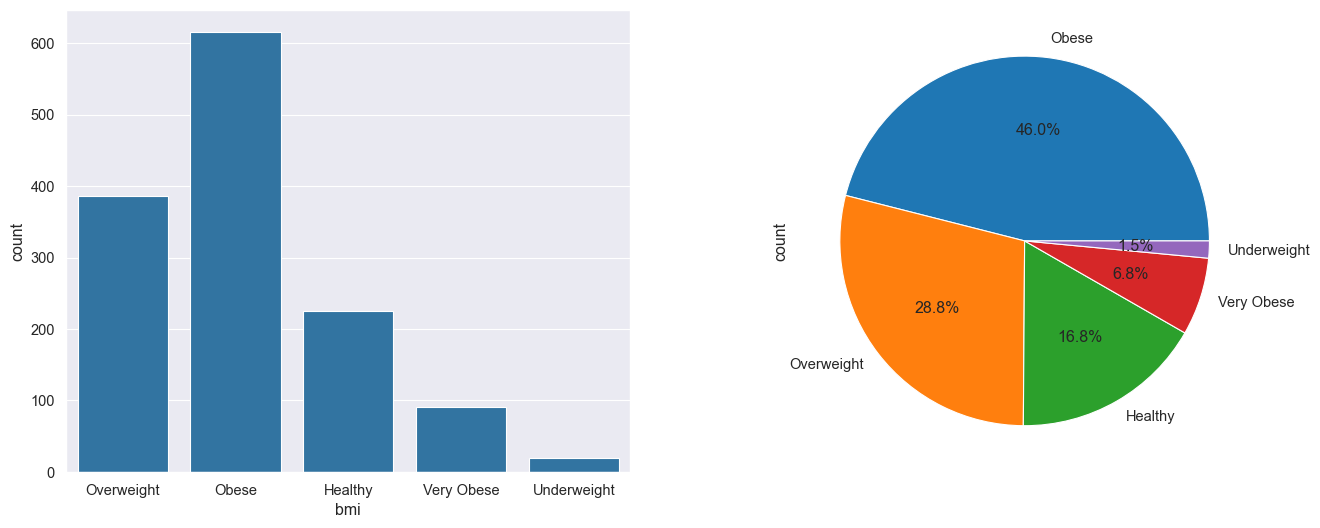

In [25]:
fig = plt.figure(figsize=(16,6))
ax1, ax2 = fig.subplots(1,2)
sns.countplot(x=num_to_cat_df['bmi'], ax=ax1)
num_to_cat_df['bmi'].value_counts().plot(kind='pie', ax=ax2, autopct='%.1f%%')

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='sex', ylabel='count'>

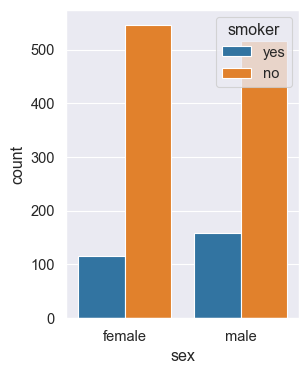

In [27]:
plt.figure(figsize=(3, 4))
sns.countplot(x=df['sex'], hue=df['smoker'])

<Axes: xlabel='children', ylabel='count'>

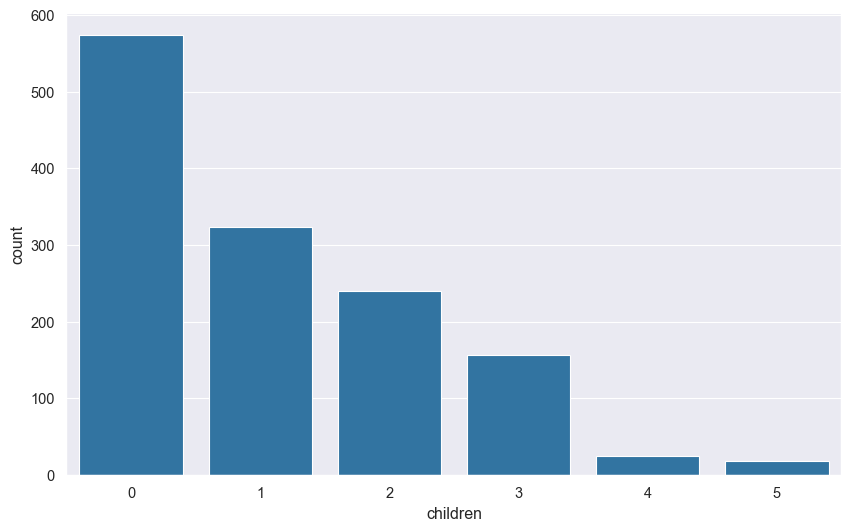

In [28]:
sns.countplot(x=df['children'])

<Axes: xlabel='smoker', ylabel='count'>

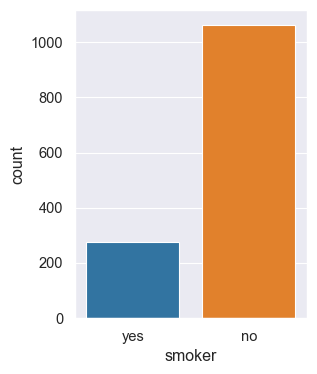

In [29]:
plt.figure(figsize=(3, 4))
sns.countplot(x=df['smoker'], hue=df['smoker'])

<Axes: ylabel='count'>

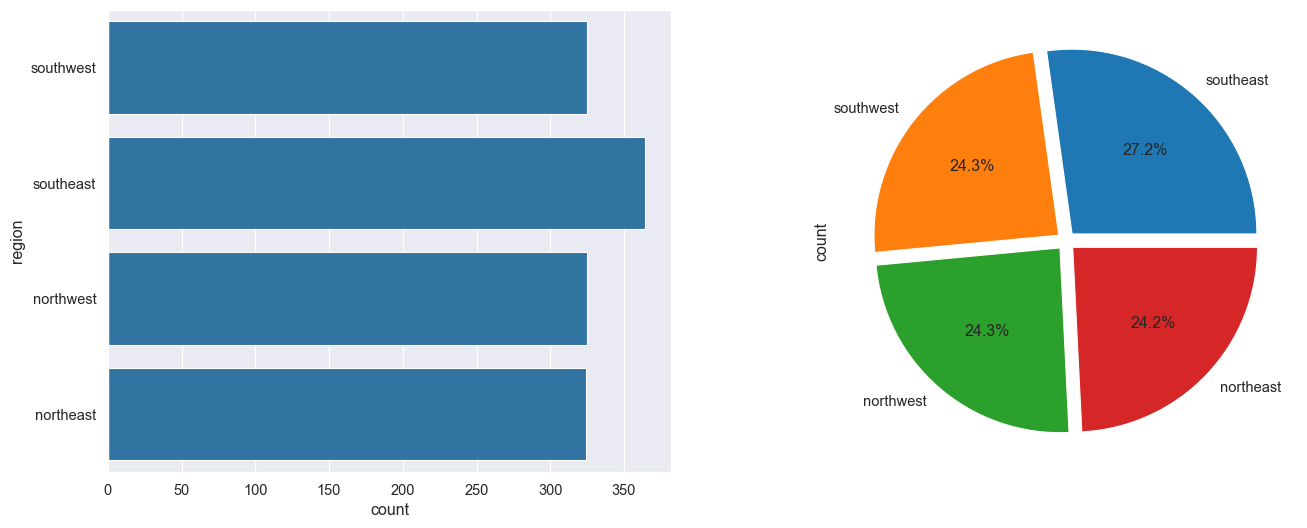

In [30]:
fig = plt.figure(figsize=(16, 6))
ax1, ax2 = fig.subplots(1, 2)
sns.countplot(df['region'], ax=ax1)
df['region'].value_counts().plot(kind='pie', ax=ax2, explode=[0.05]*4, autopct='%.1f%%')

<Axes: xlabel='charges', ylabel='Count'>

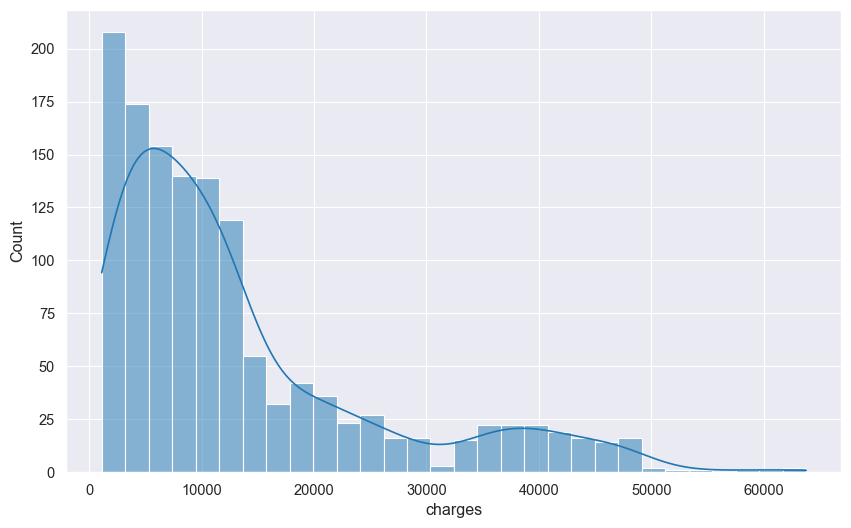

In [31]:
sns.histplot(x=df['charges'], kde=True)

In [32]:
df['charges'].skew()

np.float64(1.5158796580240388)

## Bivariate Exploratory Data Analysis

<Axes: xlabel='smoker', ylabel='count'>

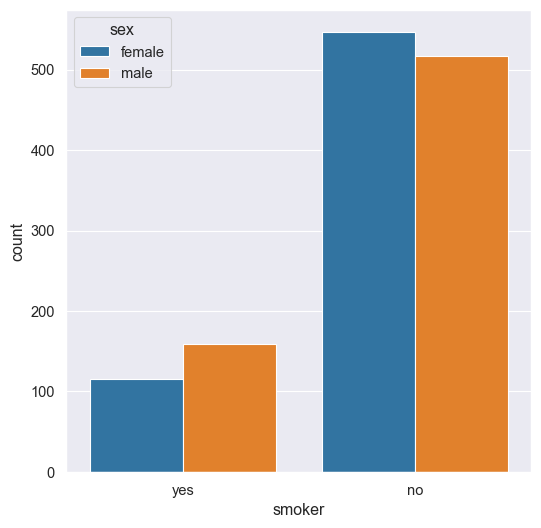

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['smoker'], hue=df['sex'])

<Axes: xlabel='bmi', ylabel='count'>

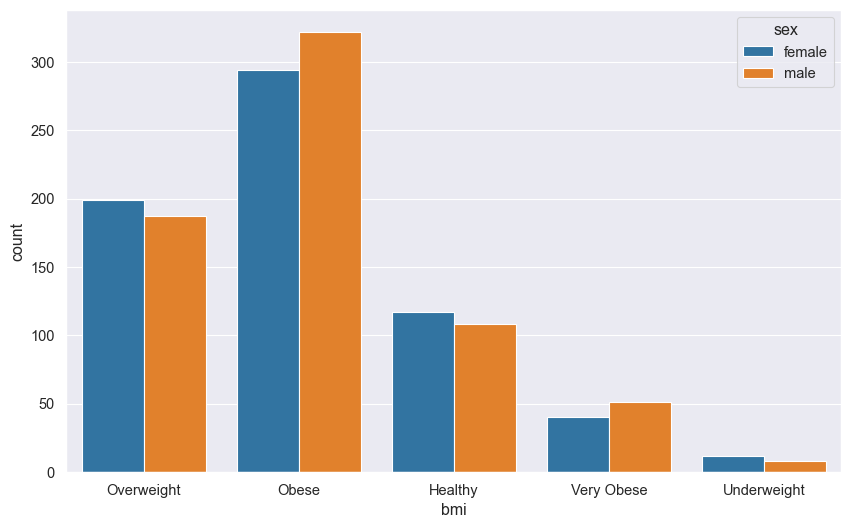

In [34]:
sns.countplot(x=num_to_cat_df['bmi'], hue=df['sex'])

<Axes: ylabel='bmi'>

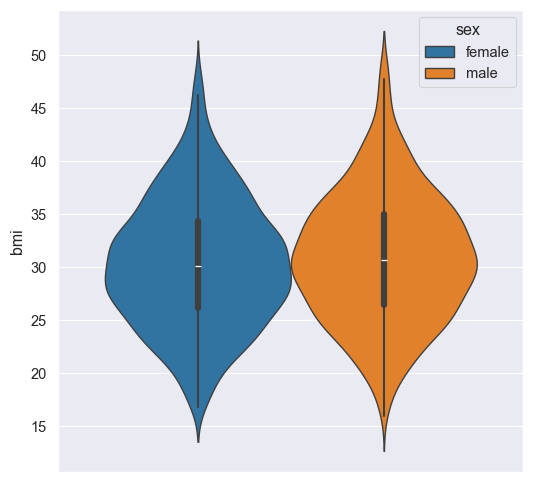

In [35]:
plt.figure(figsize=(6,6))
sns.violinplot(hue=df['sex'], y=df['bmi'])

In [36]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: ylabel='charges'>

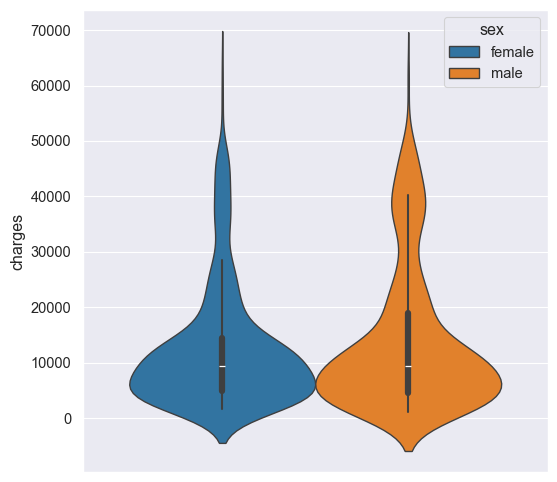

In [37]:
plt.figure(figsize=(6,6))
sns.violinplot(hue=df['sex'], y=df['charges'])

<Axes: ylabel='charges'>

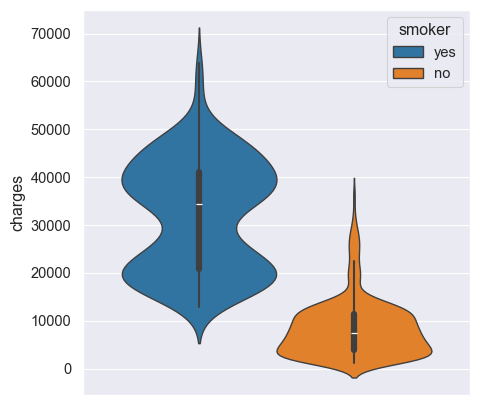

In [38]:
plt.figure(figsize=(5,5))
sns.violinplot(hue=df['smoker'], y=df['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

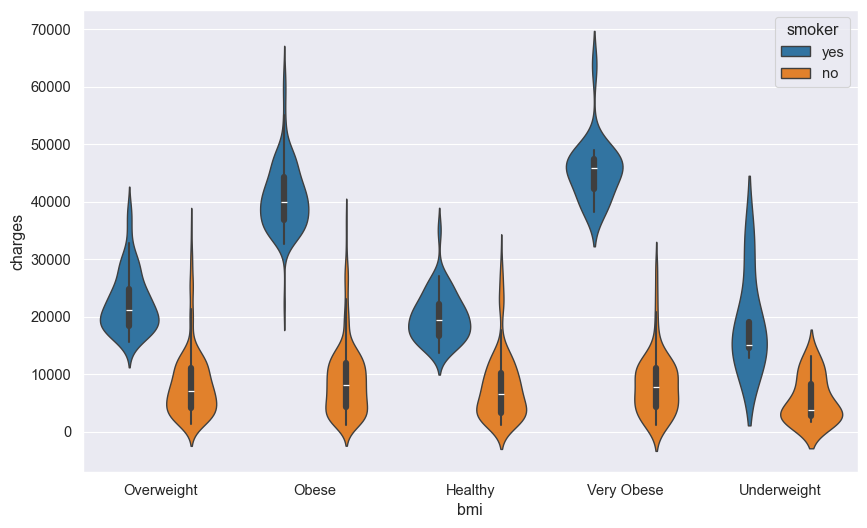

In [39]:
sns.violinplot(x=num_to_cat_df['bmi'], y=df['charges'], hue=df['smoker'])

<Axes: xlabel='region', ylabel='charges'>

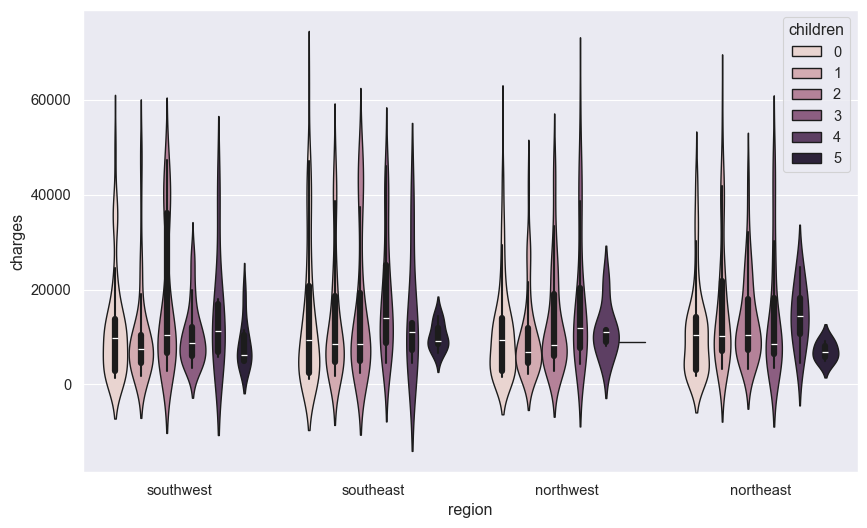

In [40]:
sns.violinplot(x=df['region'], y=df['charges'], hue=df['children'])

<Axes: xlabel='bmi', ylabel='charges'>

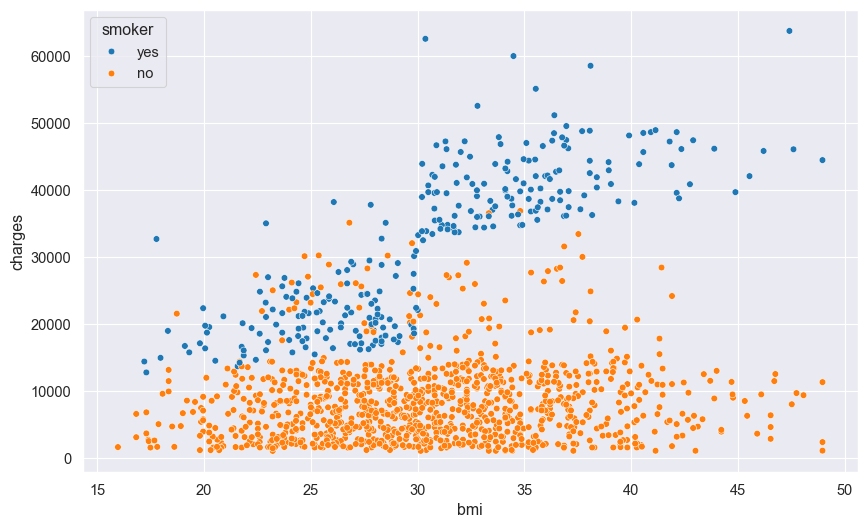

In [41]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

In [42]:
df[num_cols]

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


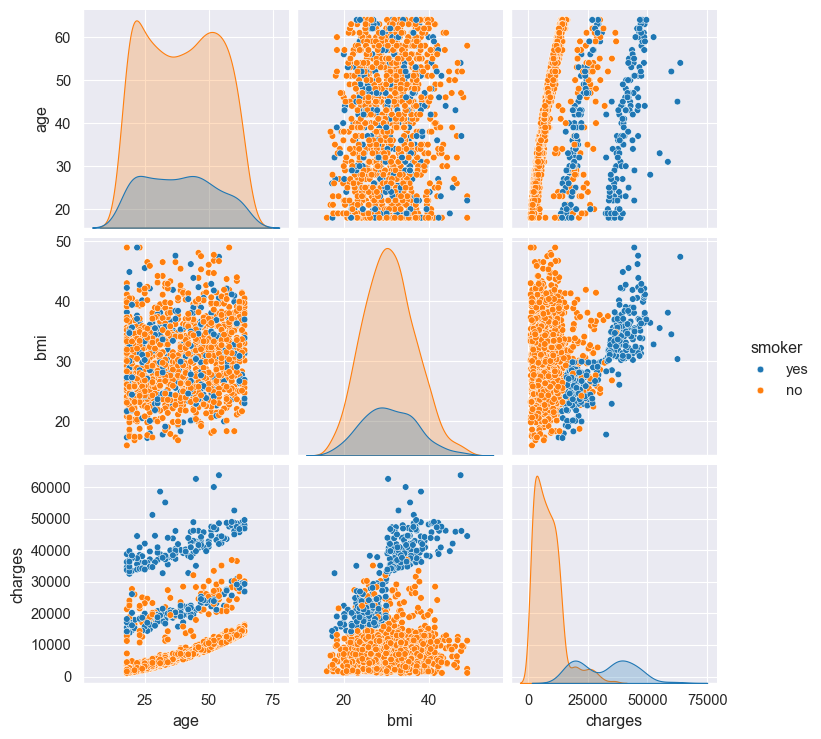

In [43]:
sns.pairplot(df[['age', 'bmi', 'smoker', 'charges']], hue='smoker')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
ins_corr = df[num_cols].drop('children', axis=1).corr()
ins_corr

,age,bmi,charges
age,1.000000,0.111191,0.299008
bmi,0.111191,1.000000,0.198612
charges,0.299008,0.198612,1.000000


<Axes: >

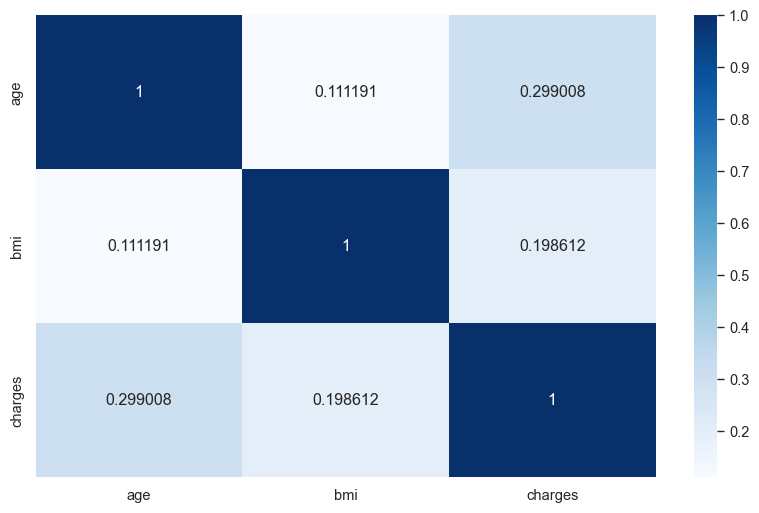

In [46]:
sns.heatmap(ins_corr, cmap='Blues', annot=True, fmt='g')

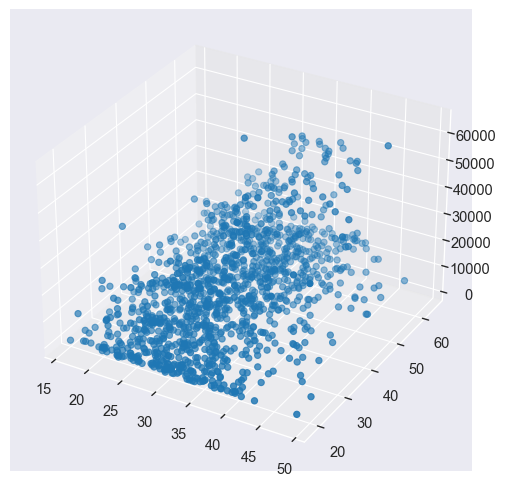

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['bmi'],df['age'],df['charges']);

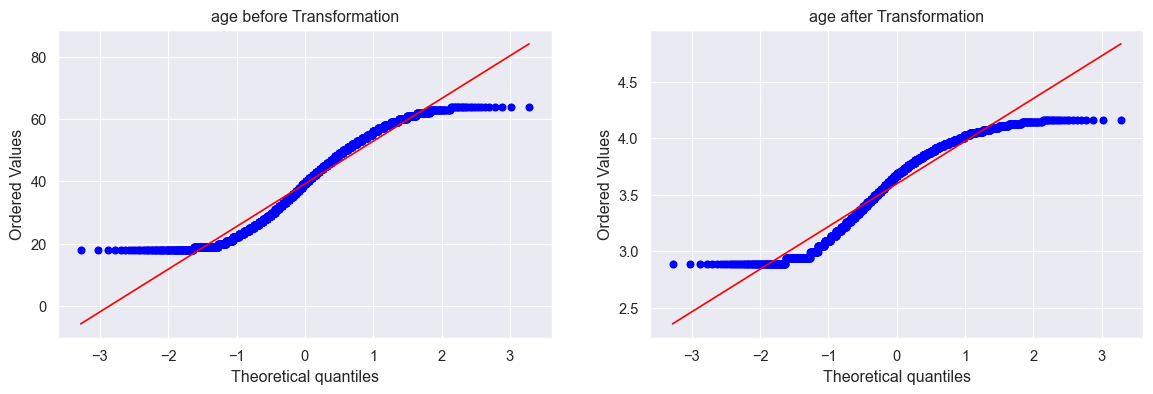

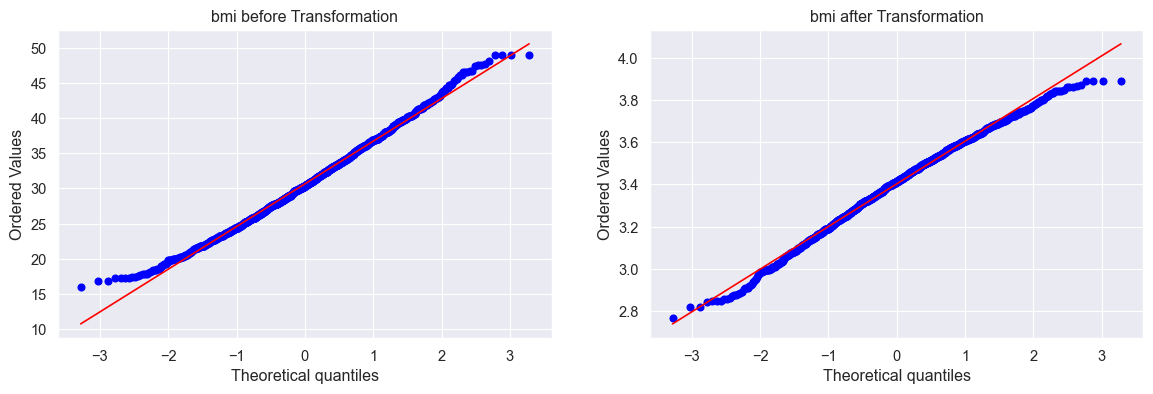

In [48]:
from copy import deepcopy 
def log_transform(val):
    return np.log(val)
import scipy.stats as stats
num_cols = ['age','bmi']
temp_df = deepcopy(df)
for col in num_cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col} before Transformation')    
    
    temp_df[col] = df[col].apply(log_transform)
    
    plt.subplot(122)
    stats.probplot(temp_df[col], dist="norm", plot=plt)
    plt.title(f'{col} after Transformation')
    plt.show();

# Model Training

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop(columns='charges', axis=1)
y = df['charges']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [52]:
X.head(1)

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest


In [53]:
numeric_cols = [0, 2, 3]
category_cols = [1, 4, 5]

In [54]:
num_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

In [55]:
cat_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

In [56]:
col_trans = ColumnTransformer(transformers=[
    ('numeric', num_pipe, numeric_cols),
    ('categoric', cat_pipe, category_cols)],
                              remainder='drop',
                              n_jobs=-1)

In [57]:
full_pipe = Pipeline(steps=[
    ('col_trans', col_trans)
])

In [58]:
X_train = full_pipe.fit_transform(X_train)
X_test = full_pipe.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linear = LinearRegression()

In [61]:
linear.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = linear.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rsme = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [65]:
def adjusted_r2(r2, n_rows, n_cols):
    return 1 - ((1-r2)*(n_rows-1))/(n_rows-1-n_cols)

In [66]:
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])

In [67]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rsme:0.2f}")
print(f"R-squared score: {r2:.3f}")
print(f"Adjusted R-squared score: {adj_r2:.3f}")

Mean Absolute Error: 4191.14
Mean Squared Error: 33697526.89
Root Mean Squared Error: 5804.96
R-squared score: 0.783
Adjusted R-squared score: 0.774


<Axes: xlabel='charges', ylabel='Density'>

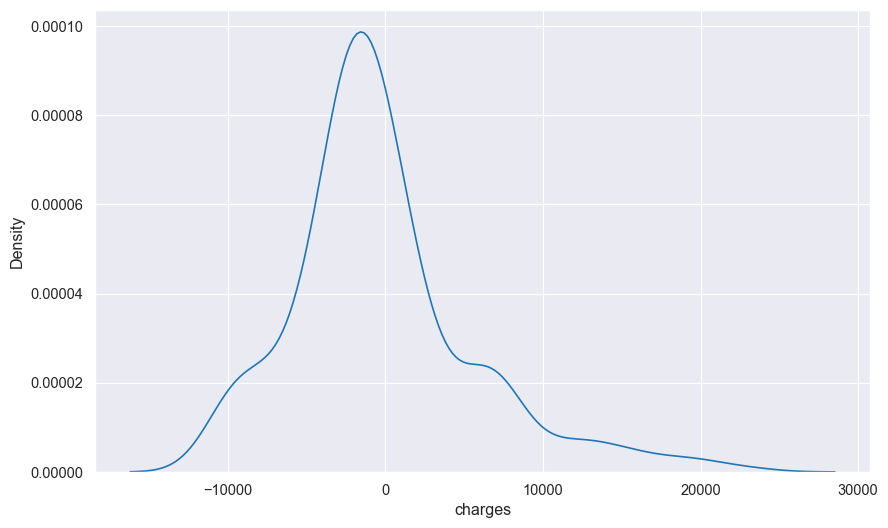

In [68]:
residual = y_test - y_pred
sns.kdeplot(residual)

In [69]:
residual.skew()

np.float64(1.1357871564623772)

In [70]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Introduce Log Transformation

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [72]:
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_trans', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
    ])

In [73]:
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [74]:
col_trans = ColumnTransformer(transformers=[
    ('numeric', num_pipe, numeric_cols),
    ('category', cat_pipe, category_cols)],
                              remainder='drop',
                             n_jobs=-1)

In [75]:
full_pipe = Pipeline(steps=[
    ('full_pipe', col_trans)])

In [76]:
X_train = full_pipe.fit_transform(X_train)
X_test = full_pipe.transform(X_test)

In [77]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = linear_reg.predict(X_test)

In [79]:
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rsme = np.sqrt(mse)
linear_r2 = r2_score(y_test, y_pred)

In [80]:
linear_mae

np.float64(4402.05087036331)

## Ridge Regression

In [81]:
ridge = Ridge()

In [82]:
parameters = {'alpha': [1e-6, 1e-5, 1e-3, 0.01 ,0.1, 1, 1.25, 1.5, 2, 5, 10]}

In [83]:
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

In [84]:
ridge_random = RandomizedSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5, random_state=42, n_iter=10)

In [85]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-06, 1e-05, 0.001, 0.01, 0.1, 1, 1.25, 1.5,
                                   2, 5, 10]},
             scoring='neg_mean_squared_error')

In [86]:
ridge_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [1e-06, 1e-05, 0.001, 0.01,
                                                  0.1, 1, 1.25, 1.5, 2, 5,
                                                  10]},
                   random_state=42, scoring='neg_mean_squared_error')

In [87]:
ridge_grid_pred = ridge_grid.best_estimator_.predict(X_test)

In [88]:
ridge_grid_mae = mean_absolute_error(y_test, ridge_grid_pred)

In [89]:
ridge_random_pred = ridge_random.best_estimator_.predict(X_test)

In [90]:
ridge_random_mae = mean_absolute_error(y_test, ridge_random_pred)
ridge_random_mae

np.float64(4410.567365562664)

In [91]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rsme:0.2f}")
print(f"R-squared score: {r2:.3f}")
print(f"Adjusted R-squared score: {adj_r2:.3f}")

Mean Absolute Error: 4191.14
Mean Squared Error: 33697526.89
Root Mean Squared Error: 5804.96
R-squared score: 0.783
Adjusted R-squared score: 0.774


## Lasso Regularization

In [92]:
lasso = Lasso()

In [93]:
parameters = {'alpha': [1e-6, 1e-5, 1e-3, 0.01 ,0.1, 1, 1.25, 1.5, 2, 5, 10]}

In [94]:
lasso_grid = GridSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error')

In [95]:
lasso_random = RandomizedSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42)

In [96]:
lasso_grid.fit(X_train, y_train)

C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.001, 0.01, 0.1, 1, 1.25, 1.5,
                                   2, 5, 10]},
             scoring='neg_mean_squared_error')

In [97]:
lasso_random.fit(X_train, y_train)

C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [1e-06, 1e-05, 0.001, 0.01,
                                                  0.1, 1, 1.25, 1.5, 2, 5,
                                                  10]},
                   random_state=42, scoring='neg_mean_squared_error')

In [98]:
lasso_grid_pred = lasso_grid.best_estimator_.predict(X_test)

In [99]:
lasso_grid_mae = mean_absolute_error(y_test, lasso_grid_pred)

In [100]:
lasso_grid_mae

np.float64(4407.814484857089)

In [101]:
lasso_r2 = r2_score(y_test, lasso_grid_pred)
lasso_r2

0.7737242579092573

In [102]:
lasso_random_pred = lasso_random.best_estimator_.predict(X_test)

In [103]:
lasso_random_mae = mean_absolute_error(y_test, lasso_random_pred)

## ElasticNet Regularization

In [104]:
elastic = ElasticNet()

In [105]:
elastic_params = {'alpha': [1e-6, 1e-5, 1e-3, 0.01 ,0.1, 1, 1.25, 1.5, 2, 5, 10],
                  'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9]}

In [106]:
elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='neg_mean_squared_error')

In [107]:
elastic_random = RandomizedSearchCV(elastic, elastic_params, cv=5, scoring='neg_mean_squared_error', random_state=42, n_iter=10)

In [108]:
elastic_grid.fit(X_train, y_train)

C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+10, tolerance: 1.242e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.679e+10, tolerance: 1.194e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-06, 1e-05, 0.001, 0.01, 0.1, 1, 1.25, 1.5,
                                   2, 5, 10],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9]},
             scoring='neg_mean_squared_error')

In [109]:
elastic_random.fit(X_train, y_train)

C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+10, tolerance: 1.242e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+10, tolerance: 1.194e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

RandomizedSearchCV(cv=5, estimator=ElasticNet(),
                   param_distributions={'alpha': [1e-06, 1e-05, 0.001, 0.01,
                                                  0.1, 1, 1.25, 1.5, 2, 5, 10],
                                        'l1_ratio': [0.1, 0.25, 0.5, 0.75,
                                                     0.9]},
                   random_state=42, scoring='neg_mean_squared_error')

In [110]:
elastic_grid_pred = elastic_grid.best_estimator_.predict(X_test)

In [111]:
elastic_grid_mae = mean_absolute_error(y_test, elastic_grid_pred)

In [112]:
elastic_grid_mae

np.float64(4417.349246231012)

In [113]:
r2_elastic_grid = r2_score(y_test, elastic_grid_pred)

In [114]:
r2_elastic_grid

0.773810702302228

In [115]:
elastic_random_pred = elastic_random.best_estimator_.predict(X_test)

In [116]:
elastic_random_mae = mean_absolute_error(y_test, elastic_random_pred)

In [117]:
elastic_random_mae

np.float64(4408.136782385352)

In [118]:
r2_elastic_random = r2_score(y_test, elastic_random_pred)
r2_elastic_random

0.7740631769935623

## Model Performance Comparison

In [119]:
mae_dict = {
    "Linear Regression": linear_mae,
    "Ridge Regression (Grid Search)": ridge_grid_mae,
    "Ridge Regression (Random Search)": ridge_random_mae,
    "Lasso Regression (Grid Search)": lasso_grid_mae,
    "Lasso Regression (Random Search)": lasso_random_mae,
    "ElasticNet Regression (Grid Search)": elastic_grid_mae,
    "ElasticNet Regression (Random Search)": elastic_random_mae
}

In [120]:
best_model = min(mae_dict.items(), key=lambda x: x[1])

In [121]:
print(f"Best Model: {best_model[0]}")
print(f"Mean Absolute Erorr: {round(best_model[1], 2)}")

Best Model: Linear Regression
Mean Absolute Erorr: 4402.05


## Explore Non-linear Algorithms

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [123]:
def best_regression_model(X, y, models=[RandomForestRegressor(random_state=42)], cv=3, eval_para='r2'):
    result_dict = {'model':[], 'result':[]}
    for model in models:
        score = cross_val_score(model, X, y, cv=cv, scoring=eval_para)
        result_dict['model'].append(str(model).rstrip('()'))
        result_dict['result'].append(round(score.mean(), 3))
    return result_dict

In [124]:
model_list = [DecisionTreeRegressor(), KNeighborsRegressor(), SVR()]

In [125]:
result = best_regression_model(X_train, y_train, models=model_list, cv=5)

In [126]:
result_df = pd.DataFrame(result, index=range(1, len(result['model'])+1))
result_df

,model,result
1,DecisionTreeRegressor,0.703
2,KNeighborsRegressor,0.758
3,SVR,-0.100


## Ensemble Methods

In [127]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor

In [128]:
ensemble_list = [BaggingRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), RandomForestRegressor()]

In [129]:
result_ensemnle = best_regression_model(X_train, y_train, models=ensemble_list, cv=5)

In [130]:
ensemble_df = pd.DataFrame(result_ensemnle, index=range(1, len(result_ensemnle['model'])+1))
ensemble_df

,model,result
1,BaggingRegressor,0.814
2,AdaBoostRegressor,0.807
3,GradientBoostingRegressor,0.841
4,RandomForestRegressor,0.829


## Voting Regressor

In [131]:
linear = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
grad = GradientBoostingRegressor()
estimators = [('lr', linear), ('dtr', tree), ('rfr', forest), ('gbr', grad)]

In [132]:
voting = VotingRegressor(estimators)

In [133]:
score_vote = cross_val_score(voting, X_train, y_train, scoring='r2', cv=5)

In [134]:
print(f"r2 score: {round(score_vote.mean(), 3)}")

r2 score: 0.829


## Obervation: 
### With the higherst R2 score, Gradient Boosting appears to be the best 

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [136]:
num_cols = [0, 2, 3]

In [137]:
cat_cols = [1, 4, 5]

In [138]:
num_pipe = Pipeline(steps=[
    ('num', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scale', StandardScaler())
])

In [139]:
cat_pipe = Pipeline(steps=[
    ('cat', SimpleImputer(strategy='most_frequent')),
    ('hot', OneHotEncoder(handle_unknown='ignore'))
])

In [140]:
col_trans = ColumnTransformer(transformers=[
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)],
                             remainder='passthrough',
                             n_jobs=-1)

In [141]:
full_pipe = Pipeline(steps=[
    ('preprocess', col_trans),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

In [142]:
X = df.drop(columns=['charges'])
y = df['charges']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [144]:
full_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [0, 2, 3]),
                                                 ('cat',
                                                  Pipeline(steps=[('cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 4, 5])])),
                ('gbr', GradientBoostingRegressor(random_state=42))])

In [145]:
grad_pred = full_pipe.predict(X_test)

In [146]:
r2_grad = r2_score(y_test, grad_pred)
mae_grad = mean_absolute_error(y_test, grad_pred)
mse_grad = mean_squared_error(y_test, grad_pred)
rsme_grad = np.sqrt(mse_grad)

In [147]:
print(f"R2 Score: {round(r2_grad, 3)}")
print(f"Mean Absolute Error: {round(mae_grad, 3)}")
print(f"Mean Squared Error: {round(mse_grad, 3)}")
print(f"Root Mean Squared Error: {round(rsme_grad, 3)}")

R2 Score: 0.879
Mean Absolute Error: 2404.547
Mean Squared Error: 18770460.489
Root Mean Squared Error: 4332.489


## Compute 95% Confidence Interval

In [148]:
from scipy import stats 

In [149]:
confidence = 0.95
squared_error = (grad_pred - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_error)-1,
                         loc=squared_error.mean(),
                         scale=stats.sem(squared_error))
                        )

array([3336.5634609 , 5138.89727949])

## Model Deployment

In [150]:
import pickle

In [151]:
pickle.dump(full_pipe, open('insurance.pkl', 'wb'))

In [152]:
final = pickle.load(open('insurance.pkl', 'rb'))

In [175]:
df.sample(random_state=23)

,age,sex,bmi,children,smoker,region,charges
918,61,female,28.2,0,no,southwest,13041.921


In [176]:
sample1 = np.array([61, 'female', 28.2, 0, 'no', 'southwest'], dtype=object).reshape(1,6)

In [177]:
test1 = final.predict(sample1)
print(f"Predicted charge amount: ${round(test1[0], 2)}")

Predicted charge amount: $14000.46


### Observation:
#### The predicted claim amount is $958 (7%) higher than the actual amount

In [181]:
df.sample(random_state=50)

,age,sex,bmi,children,smoker,region,charges
589,38,female,30.69,1,no,southeast,5976.8311


In [182]:
sample2 = np.array([38, 'female', 30.69, 1, 'no', 'southeast'], dtype=object).reshape(1,6)

In [183]:
test2 = final.predict(sample2)
print(f"Predicted claim amount: ${round(test2[0], 2)}")

Predicted claim amount: $6536.62


### Observation:
#### The predicted claim amount is $560 higher than the actual amount